In [1]:
import os
import numpy as np
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, fbeta_score, accuracy_score
from sklearn.metrics import confusion_matrix
import ast

['test_all_sens.csv', 'test_all_sens_wrong.csv', 'test_all_spec.csv', 'test_all_spec_wrong.csv', 'test_conform_sens.csv', 'test_conform_sens_wrong.csv', 'test_conform_spec.csv', 'test_conform_spec_wrong.csv', 'test_epi_sens.csv', 'test_epi_sens_wrong.csv', 'test_epi_spec.csv', 'test_epi_spec_wrong.csv', 'test_evdl_sens.csv', 'test_evdl_sens_wrong.csv', 'test_evdl_spec.csv', 'test_evdl_spec_wrong.csv', 'test_majority_sens.csv', 'test_majority_sens_wrong.csv', 'test_majority_spec.csv', 'test_majority_spec_wrong.csv', 'test_tta_sens.csv', 'test_tta_sens_wrong.csv', 'test_tta_spec.csv', 'test_tta_spec_wrong.csv', 'val_all_sens.csv', 'val_all_sens_wrong.csv', 'val_all_spec.csv', 'val_all_spec_wrong.csv', 'val_conform_sens.csv', 'val_conform_sens_wrong.csv', 'val_conform_spec.csv', 'val_conform_spec_wrong.csv', 'val_epi_sens.csv', 'val_epi_sens_wrong.csv', 'val_epi_spec.csv', 'val_epi_spec_wrong.csv', 'val_evdl_sens.csv', 'val_evdl_sens_wrong.csv', 'val_evdl_spec.csv', 'val_evdl_spec_wrong.c

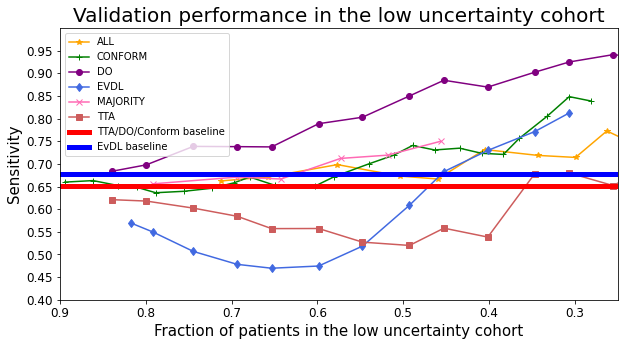

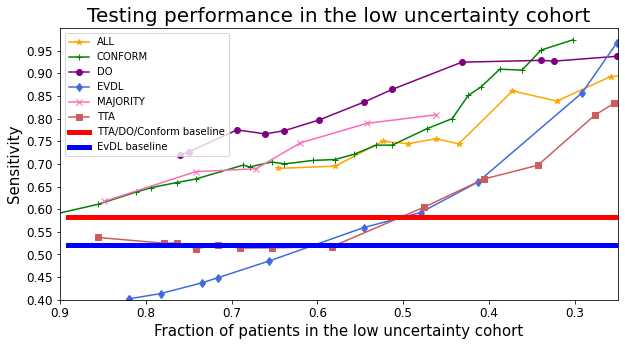

In [2]:
load_dir = r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_miccai\save_folder\sens_spec'

print_ = True

legend_line_color = [('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), 
                     ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')]

legend = []
reorder = [('epi', 0), ('tta', 1), ('conform', 2), ('majority', 3), ('all', 4), ('evdl', 5)]

print(sorted([x for x in os.listdir(load_dir) if 'csv' in x]))

reorder_list = []

for x, _ in reorder:
    reorder_list.extend([y for y in os.listdir(load_dir) if x in y])


plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' not in file and 'spec' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_sens'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_sens'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.1, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.4, 1])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0.25, 1, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in x], linewidth=5, color='blue')
# print(y2, save_y)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.title('Validation performance in the low uncertainty cohort', fontsize=20)
plt.ylabel('Sensitivity', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.xlim([0.25, 0.9])
plt.ylim([0.4, 1])
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1a val low sens-yi - rescaled.png', dpi=300)

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' not in file and 'spec' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_sens'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_sens'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.1, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.4, 1])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
        
        
x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in x], linewidth=5, color='blue')
# print(y2, save_y)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.title('Testing performance in the low uncertainty cohort', fontsize=20)
plt.ylabel('Sensitivity', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.xlim([0.25, 0.9])
plt.ylim([0.4, 1])
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1b test low sens-yi - rescaled.png', dpi=300)


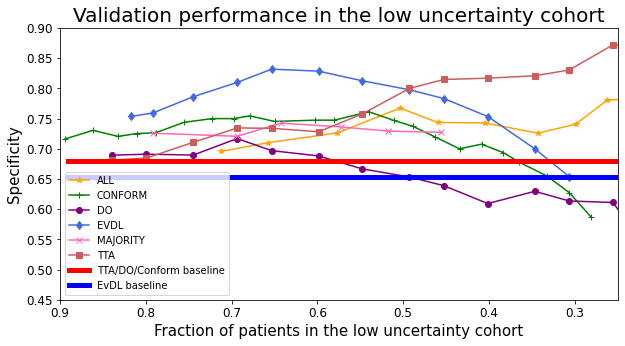

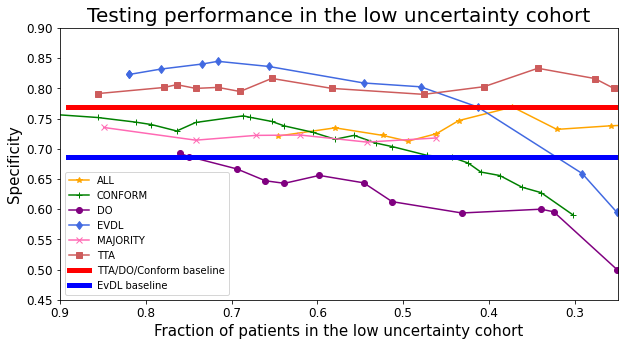

In [7]:

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' not in file and 'spec' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_spec'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_spec'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.1, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        
        plt.xlim([0.25, 0.9])
        plt.ylim([0.45, 0.9])
        
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in x], linewidth=5, color='blue')
# print(y2, save_y)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.title('Validation performance in the low uncertainty cohort', fontsize=20)
plt.ylabel('Specificity', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.legend(legend, loc='lower left')
plt.xlim([0.25, 0.9])
plt.ylim([0.45, 0.9])
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1a val low spec-yi - rescaled.png', dpi=300)

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' not in file and 'spec' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_spec'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_spec'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.1, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.45, 0.9])
        
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
        
        
x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in x], linewidth=5, color='blue')
# print(y2, save_y)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.title('Testing performance in the low uncertainty cohort', fontsize=20)
plt.ylabel('Specificity', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.xlim([0.25, 0.9])
plt.ylim([0.45, 0.9])
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1b test low spec-yi - rescaled.png', dpi=300)


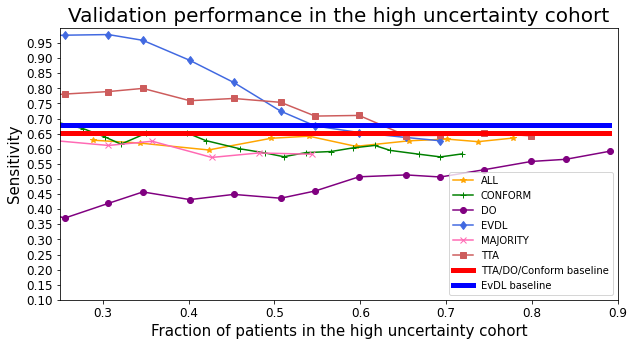

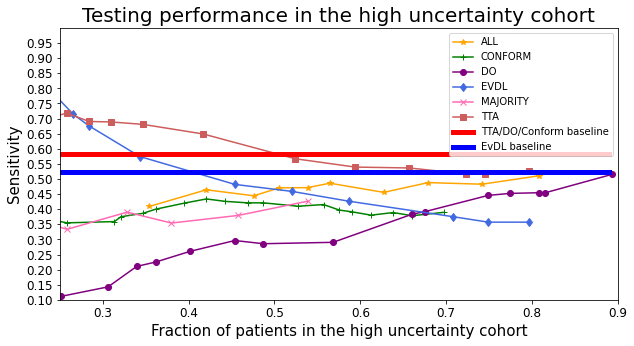

In [4]:


legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' in file and 'spec' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_sens'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_sens'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274 for x in x]
        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.1, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.1, 1])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in x], linewidth=5, color='blue')
plt.title('Validation performance in the high uncertainty cohort', fontsize=20)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.xlim([0.25, 0.9])
plt.ylim([0.1, 1])
# plt.gca().invert_xaxis()
plt.ylabel('Sensitivity', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
plt.legend(legend)
if not print_:
    plt.show()
else:
    plt.savefig('1c val high sens-yi - rescaled.png', dpi=300)

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' in file and 'spec' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_sens'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_sens'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.1, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.1, 1])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in x], linewidth=5, color='blue')
# plt.yticks(np.arange(0.6, 85, 0.05))
plt.title('Testing performance in the high uncertainty cohort', fontsize=20)
plt.xlim([0.25, 0.9])
plt.ylim([0.1, 1])
# plt.gca().invert_xaxis()
plt.ylabel('Sensitivity', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.legend(legend)
if not print_:
    plt.show()
else:
    plt.savefig('1d test high sens-yi - rescaled.png', dpi=300)

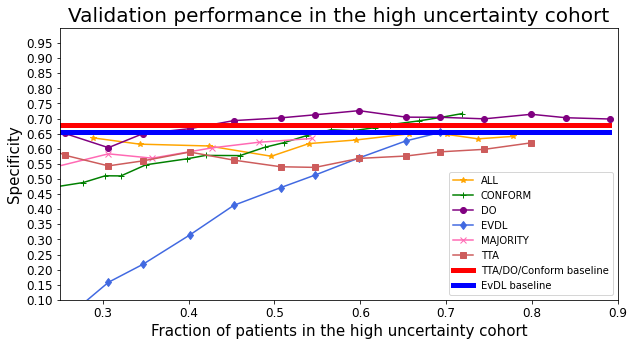

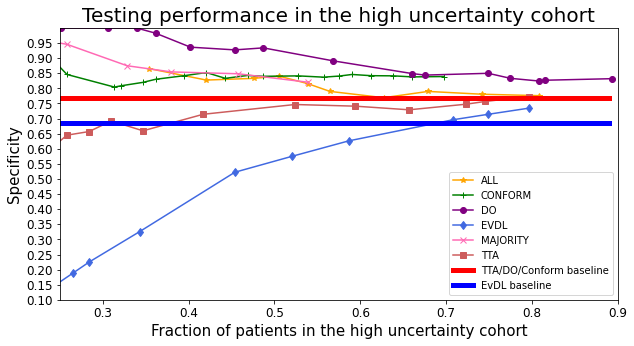

In [5]:


legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' in file and 'spec' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_spec'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_spec'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274 for x in x]
        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.1, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.1, 1])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in x], linewidth=5, color='blue')
plt.title('Validation performance in the high uncertainty cohort', fontsize=20)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.xlim([0.25, 0.9])
plt.ylim([0.1, 1])
# plt.gca().invert_xaxis()
plt.ylabel('Specificity', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
plt.legend(legend)
if not print_:
    plt.show()
else:
    plt.savefig('1c val high spec-yi - rescaled.png', dpi=300)

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(os.listdir(load_dir)):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' in file and 'spec' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_spec'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_spec'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.1, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.1, 1])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in x], linewidth=5, color='blue')
# plt.yticks(np.arange(0.6, 85, 0.05))
plt.title('Testing performance in the high uncertainty cohort', fontsize=20)
plt.xlim([0.25, 0.9])
plt.ylim([0.1, 1])
# plt.gca().invert_xaxis()
plt.ylabel('Specificity', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.legend(legend)
if not print_:
    plt.show()
else:
    plt.savefig('1d test high spec-yi - rescaled.png', dpi=300)